# Effect of cutoffs on solvation free energies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [35]:
# Load the data
file_path = '/home/lindseywhitmore/projects/lennard-jones-miniproject/anthracene/new_cutoffs/Anthracene Sims - All 2024.3_ with 1.1-1.2.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

In [36]:
# Display the first few rows of the DataFrame
data.head()

,Modifier,range,Replicate,TI,TI error,MBAR,MBAR Error,BAR,BAR Error
0,potential-shift,75_8,1,3.822076,0.144304,3.942931,0.013968,3.937544,NaN
1,potential-shift,75_8,2,3.899290,0.152620,3.881550,0.013993,3.881410,NaN
2,potential-shift,75_8,3,3.887227,0.146360,3.910854,0.013959,3.900689,NaN
3,potential-shift,75_8,4,3.462266,0.150965,3.884304,0.013962,3.869109,NaN
4,potential-shift,75_8,5,4.097528,0.149140,3.915403,0.013980,3.903337,NaN


In [37]:
# Reshape the DataFrame to a long format for easier analysis
data_long = data.melt(id_vars=['Modifier', 'range', 'Replicate'], 
                      value_vars=['TI', 'MBAR', 'BAR'], 
                      var_name='Method', 
                      value_name='Value')

print(data_long)

             Modifier    range  Replicate Method     Value
0     potential-shift     75_8          1     TI  3.822076
1     potential-shift     75_8          2     TI  3.899290
2     potential-shift     75_8          3     TI  3.887227
3     potential-shift     75_8          4     TI  3.462266
4     potential-shift     75_8          5     TI  4.097528
..                ...      ...        ...    ...       ...
535  potential-switch  1.1_1.2          6    BAR  3.458497
536  potential-switch  1.1_1.2          7    BAR  3.430306
537  potential-switch  1.1_1.2          8    BAR  3.479505
538  potential-switch  1.1_1.2          9    BAR  3.475086
539  potential-switch  1.1_1.2         10    BAR  3.437764

[540 rows x 5 columns]


In [38]:
# Reshape the errors
error_long = data.melt(id_vars=['Modifier', 'range', 'Replicate'], 
                        value_vars=['TI error', 'MBAR Error', 'BAR Error'], 
                        var_name='Error_Method', 
                        value_name='Error_Value')

print(error_long)

             Modifier    range  Replicate Error_Method  Error_Value
0     potential-shift     75_8          1     TI error     0.144304
1     potential-shift     75_8          2     TI error     0.152620
2     potential-shift     75_8          3     TI error     0.146360
3     potential-shift     75_8          4     TI error     0.150965
4     potential-shift     75_8          5     TI error     0.149140
..                ...      ...        ...          ...          ...
535  potential-switch  1.1_1.2          6    BAR Error          NaN
536  potential-switch  1.1_1.2          7    BAR Error          NaN
537  potential-switch  1.1_1.2          8    BAR Error          NaN
538  potential-switch  1.1_1.2          9    BAR Error          NaN
539  potential-switch  1.1_1.2         10    BAR Error          NaN

[540 rows x 5 columns]


In [39]:
# Extract method names and merge error data
error_long['Method'] = error_long['Error_Method'].str.split(' ').str[0]
data_long = pd.merge(data_long, error_long[['Modifier', 'range', 'Replicate', 'Method', 'Error_Value']], 
                     on=['Modifier', 'range', 'Replicate', 'Method'], 
                     how='left')

print(data_long)

             Modifier    range  Replicate Method     Value  Error_Value
0     potential-shift     75_8          1     TI  3.822076     0.144304
1     potential-shift     75_8          2     TI  3.899290     0.152620
2     potential-shift     75_8          3     TI  3.887227     0.146360
3     potential-shift     75_8          4     TI  3.462266     0.150965
4     potential-shift     75_8          5     TI  4.097528     0.149140
..                ...      ...        ...    ...       ...          ...
535  potential-switch  1.1_1.2          6    BAR  3.458497          NaN
536  potential-switch  1.1_1.2          7    BAR  3.430306          NaN
537  potential-switch  1.1_1.2          8    BAR  3.479505          NaN
538  potential-switch  1.1_1.2          9    BAR  3.475086          NaN
539  potential-switch  1.1_1.2         10    BAR  3.437764          NaN

[540 rows x 6 columns]


In [40]:
# Group by Modifier, Method, and range to calculate mean and standard error
summary = data_long.groupby(['Modifier', 'Method', 'range']).agg(
    mean_value=('Value', 'mean'),
    sem=('Value', lambda x: np.std(x) / np.sqrt(len(x)))  # Standard Error of the Mean
).reset_index()
print(summary)

            Modifier Method    range  mean_value       sem
0       force-switch    BAR  1.1_1.2    3.484785  0.011348
1       force-switch    BAR     75_8    4.022337  0.011109
2       force-switch    BAR     85_9    3.732673  0.006631
3       force-switch    BAR      8_9    3.757321  0.012104
4       force-switch    BAR     95_1    3.593392  0.009703
5       force-switch    BAR      9_1    3.595966  0.006481
6       force-switch   MBAR  1.1_1.2    3.490996  0.011339
7       force-switch   MBAR     75_8    4.026168  0.011385
8       force-switch   MBAR     85_9    3.738783  0.006574
9       force-switch   MBAR      8_9    3.762244  0.011957
10      force-switch   MBAR     95_1    3.599197  0.009195
11      force-switch   MBAR      9_1    3.601603  0.006782
12      force-switch     TI  1.1_1.2    3.520400  0.049235
13      force-switch     TI     75_8    4.084004  0.056385
14      force-switch     TI     85_9    3.845197  0.056916
15      force-switch     TI      8_9    3.776528  0.0381

In [13]:

# import matplotlib.pyplot as plt
# import numpy as np

# # Set up the plot
# fig, ax = plt.subplots(figsize=(12, 6))

# # Set bar width and additional spacing factor
# bar_width = 0.4
# spacing_factor = 4.25  # Increase this value for more spacing
# positions = np.arange(len(summary['range'].unique())) * spacing_factor

# # Loop through each modifier
# modifiers = summary['Modifier'].unique()
# # print(modifiers)
# for i, modifier in enumerate(modifiers):
#     modifier_data = summary[summary['Modifier'] == modifier]
#     # print(modifier_data)
    
#     # Create a bar position for each method
#     for j, method in enumerate(['TI', 'BAR', 'MBAR']):
#         method_data = modifier_data[modifier_data['Method'] == method]
#         # print(method_data)
        
#         # Adjust the bar positions
#         bar_positions = positions + (j * bar_width) + (i * bar_width * 3)

#         # Ensure we have the right shape for mean and SEM
#         if len(method_data) == 0:
#             continue
        
#         # Create bars with outlines
#         ax.bar(bar_positions, method_data['mean_value'], 
#                yerr=method_data['sem'], width=bar_width, capsize=5, 
#                label=f"{modifier} - {method}", edgecolor='black')

# # Customizing the plot
# ax.set_xlabel('Range')
# ax.set_ylabel('Average Value')
# ax.set_title('Average Values by Modifier and Method')
# ax.set_xticks(positions + bar_width * 1.5)  # Center ticks in the group
# ax.set_xticklabels(summary['range'].unique())
# ax.legend(title='Modifier - Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Show the plot
# plt.tight_layout()
# plt.show()


In [14]:
# # Set a vibrant, colorblind-friendly palette for modifiers
# modifier_colors = sns.color_palette("deep", n_colors=len(summary['Modifier'].unique()))

# # Set up the main figure
# fig = plt.figure(figsize=(22, 14))  # Taller figure for a clearer layout

# # Original plot (top row)
# ax1 = fig.add_subplot(2, 1, 1)  # First plot in a 2x1 grid (top)

# # Set bar width and additional spacing factor
# bar_width = 0.4
# spacing_factor = 6.25  # Increase this value for more spacing
# positions = np.arange(len(summary['range'].unique())) * spacing_factor

# # Original plot data
# modifiers = summary['Modifier'].unique()

# # Additional offset for spacing between modifier groups
# modifier_offset = bar_width * 1.5  # Adjust this for more or less spacing

# # Loop through each modifier for the original plot
# for i, modifier in enumerate(modifiers):
#     modifier_data = summary[summary['Modifier'] == modifier]
    
#     # Create a bar position for each method
#     for j, method in enumerate(['TI', 'BAR', 'MBAR']):
#         method_data = modifier_data[modifier_data['Method'] == method]
        
#         # Adjust the bar positions with an additional offset for modifier spacing
#         bar_positions = positions + (j * bar_width) + (i * modifier_offset) + (i * bar_width * 3)

#         # Ensure we have the right shape for mean and SEM
#         if len(method_data) == 0:
#             continue
        
#         # Choose color based on the modifier
#         color = modifier_colors[i]

#         # Create bars with outlines
#         ax1.bar(bar_positions, method_data['mean_value'], 
#                 yerr=method_data['sem'], width=bar_width, capsize=5, 
#                 label=f"{modifier} - {method}", 
#                 edgecolor='black', linewidth=2,  # Increased outline thickness
#                 color=color, hatch='*' if method == 'TI' else 'x' if method == 'BAR' else 'o')

# # Customizing the original plot
# ax1.set_xlabel('Range')
# ax1.set_ylabel('Average Value')
# ax1.set_title('Average Values by Modifier and Method (Original)')
# ax1.set_xticks(positions + bar_width * 6)  # Center ticks in the group
# ax1.set_xticklabels(summary['range'].unique())
# ax1.legend(title='Modifier - Method', bbox_to_anchor=(1.05, 1), loc='upper left')
# ax1.set_ylim(bottom=3)

# #Create subplots for each modifier (bottom row)
# bottom_bar_width = 0.5  # Bar width for the bottom plots
# bottom_spacing_factor = 2.5  # Spacing factor for the bottom plots
# bottom_modifier_offset = bottom_bar_width * 0.5  # Offset for spacing between modifier groups

# for i, modifier in enumerate(modifiers):
#     ax = fig.add_subplot(2, 3, i + 4)  # Add subplot for each modifier in the second row

#     modifier_data = summary[summary['Modifier'] == modifier]

#     # Loop through each method for the subplot
#     for j, method in enumerate(['TI', 'BAR', 'MBAR']):
#         method_data = modifier_data[modifier_data['Method'] == method]

#         # Adjust the bar positions
#         bottom_positions = np.arange(len(summary['range'].unique())) * bottom_spacing_factor
#         bar_positions = bottom_positions + (j * bottom_bar_width)

#         # Ensure we have the right shape for mean and SEM
#         if len(method_data) == 0:
#             continue

#         # Choose color based on the modifier
#         color = modifier_colors[i]
        
#         # Create bars with outlines
#         ax.bar(bar_positions + (i * bottom_modifier_offset), method_data['mean_value'], 
#                yerr=method_data['sem'], width=bottom_bar_width, capsize=5, 
#                label=f"{method}",
#                edgecolor='black', linewidth=3,  # Increased outline thickness
#                color=color, hatch='*' if method == 'TI' else 'x' if method == 'BAR' else 'o')

#     # Customizing each subplot
#     ax.set_title(modifier, fontsize=14)
#     ax.set_xlabel('Range', fontsize=12)
#     ax.set_ylabel('Average Value', fontsize=12)
    
#     # Adjust x-ticks
#     tick_positions = bottom_positions + (bottom_bar_width * 1.5)
#     ax.set_xticks(tick_positions)  # Center ticks in the group
#     ax.set_xticklabels(summary['range'].unique(), fontsize=10)
#     ax.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
#     ax.set_ylim(bottom=3)

# # Main title for the figure
# fig.suptitle('Average Values by Modifier and Method', fontsize=18)

# # Adjust layout for more space between rows and larger size
# plt.tight_layout()
# plt.subplots_adjust(top=0.9, hspace=0.4)  # Adjust vertical space
# plt.show()


## Just mbar

In [66]:
# # Set a vibrant, colorblind-friendly palette for modifiers
# modifier_colors = sns.color_palette("deep", n_colors=len(summary['Modifier'].unique()))
# # Set up the main figure
# fig = plt.figure(figsize=(22, 14))  # Taller figure for a clearer layout
# # Original plot (top row)
# ax1 = fig.add_subplot(2, 1, 1)  # First plot in a 2x1 grid (top)
# # Set bar width and additional spacing factor
# bar_width = 0.4
# spacing_factor = 2.5  # Adjusted for better spacing
# positions = np.arange(len(summary['range'].unique())) * spacing_factor
# # Original plot data (only for MBAR method)
# modifiers = summary['Modifier'].unique()
# # Loop through each modifier for the original plot, showing only MBAR values
# for i, modifier in enumerate(modifiers):
#     modifier_data = summary[(summary['Modifier'] == modifier) & (summary['Method'] == 'MBAR')]
#     # Ensure we have the right shape for mean and SEM
#     if len(modifier_data) == 0:
#         continue
#     # Calculate bar positions for MBAR values of each modifier
#     bar_positions = positions + (i * bar_width * 1.5)  # Offset for spacing between modifiers
#     # Choose color based on the modifier
#     color = modifier_colors[i]
#     # Create bars with outlines
#     ax1.bar(bar_positions, modifier_data['mean_value'],
#             yerr=modifier_data['sem'], width=bar_width, capsize=5,
#             label=f"{modifier}",
#             edgecolor='black', linewidth=2,  # Increased outline thickness
#             color=color)
# # Customizing the original plot
# ax1.set_xlabel('Applied Cutoff Range (switch start-cutoff distance)', fontsize=40, labelpad=10)
# ax1.set_ylabel(r'$\Delta G_{\text{solv}}$', fontsize=40, labelpad=10)
# # ax1.set_title('Average Values by Modifier')
# ax1.set_xticks(positions + bar_width)  # Center ticks in the group
# ax1.set_xticklabels(['1.1-1.2', '0.75-0.8', '0.85-0.9', '0.8-0.9', '0.95-1.0', '0.9-1.0'], fontsize=30)
# ax1.tick_params(axis='y', labelsize=20)
# ax1.legend(title='Modifier', loc='upper right', fontsize=20, title_fontsize=25)
# ax1.set_ylim(bottom=3)
# #Create subplots for each modifier (bottom row)
# bottom_bar_width = 1.45  # Bar width for the bottom plots
# bottom_spacing_factor = 2.25  # Spacing factor for the bottom plots
# for i, modifier in enumerate(modifiers):
#     ax = fig.add_subplot(2, 3, i + 4)  # Add subplot for each modifier in the second row
#     modifier_data = summary[(summary['Modifier'] == modifier) & (summary['Method'] == 'MBAR')]
#     # Adjust the bar positions
#     bottom_positions = np.arange(len(summary['range'].unique())) * bottom_spacing_factor
#     # Ensure we have the right shape for mean and SEM
#     if len(modifier_data) == 0:
#         continue
#     # Choose color based on the modifier
#     color = modifier_colors[i]
#     # Create bars with outlines
#     ax.bar(bottom_positions, modifier_data['mean_value'],
#            yerr=modifier_data['sem'], width=bottom_bar_width, capsize=5,
#            edgecolor='black', linewidth=3,  # Increased outline thickness
#            color=color)
#     # Customizing each subplot
#     ax.set_title(modifier, fontsize=40)
#     ax.set_xlabel('Applied Cutoff Range', fontsize=30, labelpad=10)
#     ax.set_ylabel(r'$\Delta G_{\text{solv}}$', fontsize=30, labelpad=10)
#     # Adjust x-ticks
#     ax.set_xticks(bottom_positions)  # Center ticks in the group
#     ax.set_xticklabels(['1.1-1.2','0.75-0.8', '0.85-0.9', '0.8-0.9', '0.95-1.0', '0.9-1.0'], fontsize=16)
#     ax.tick_params(axis='y', labelsize=20)
#     # ax.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
#     ax.set_ylim(bottom=3, top=4.2)
# # Main title for the figure
# fig.suptitle(r'$\Delta G_{\text{solv}}$', fontsize=60)
# # Adjust layout for more space between rows and larger size
# plt.tight_layout()
# plt.subplots_adjust(top=0.9, hspace=0.8, wspace=0.3)  # Adjust vertical space
# plt.show()

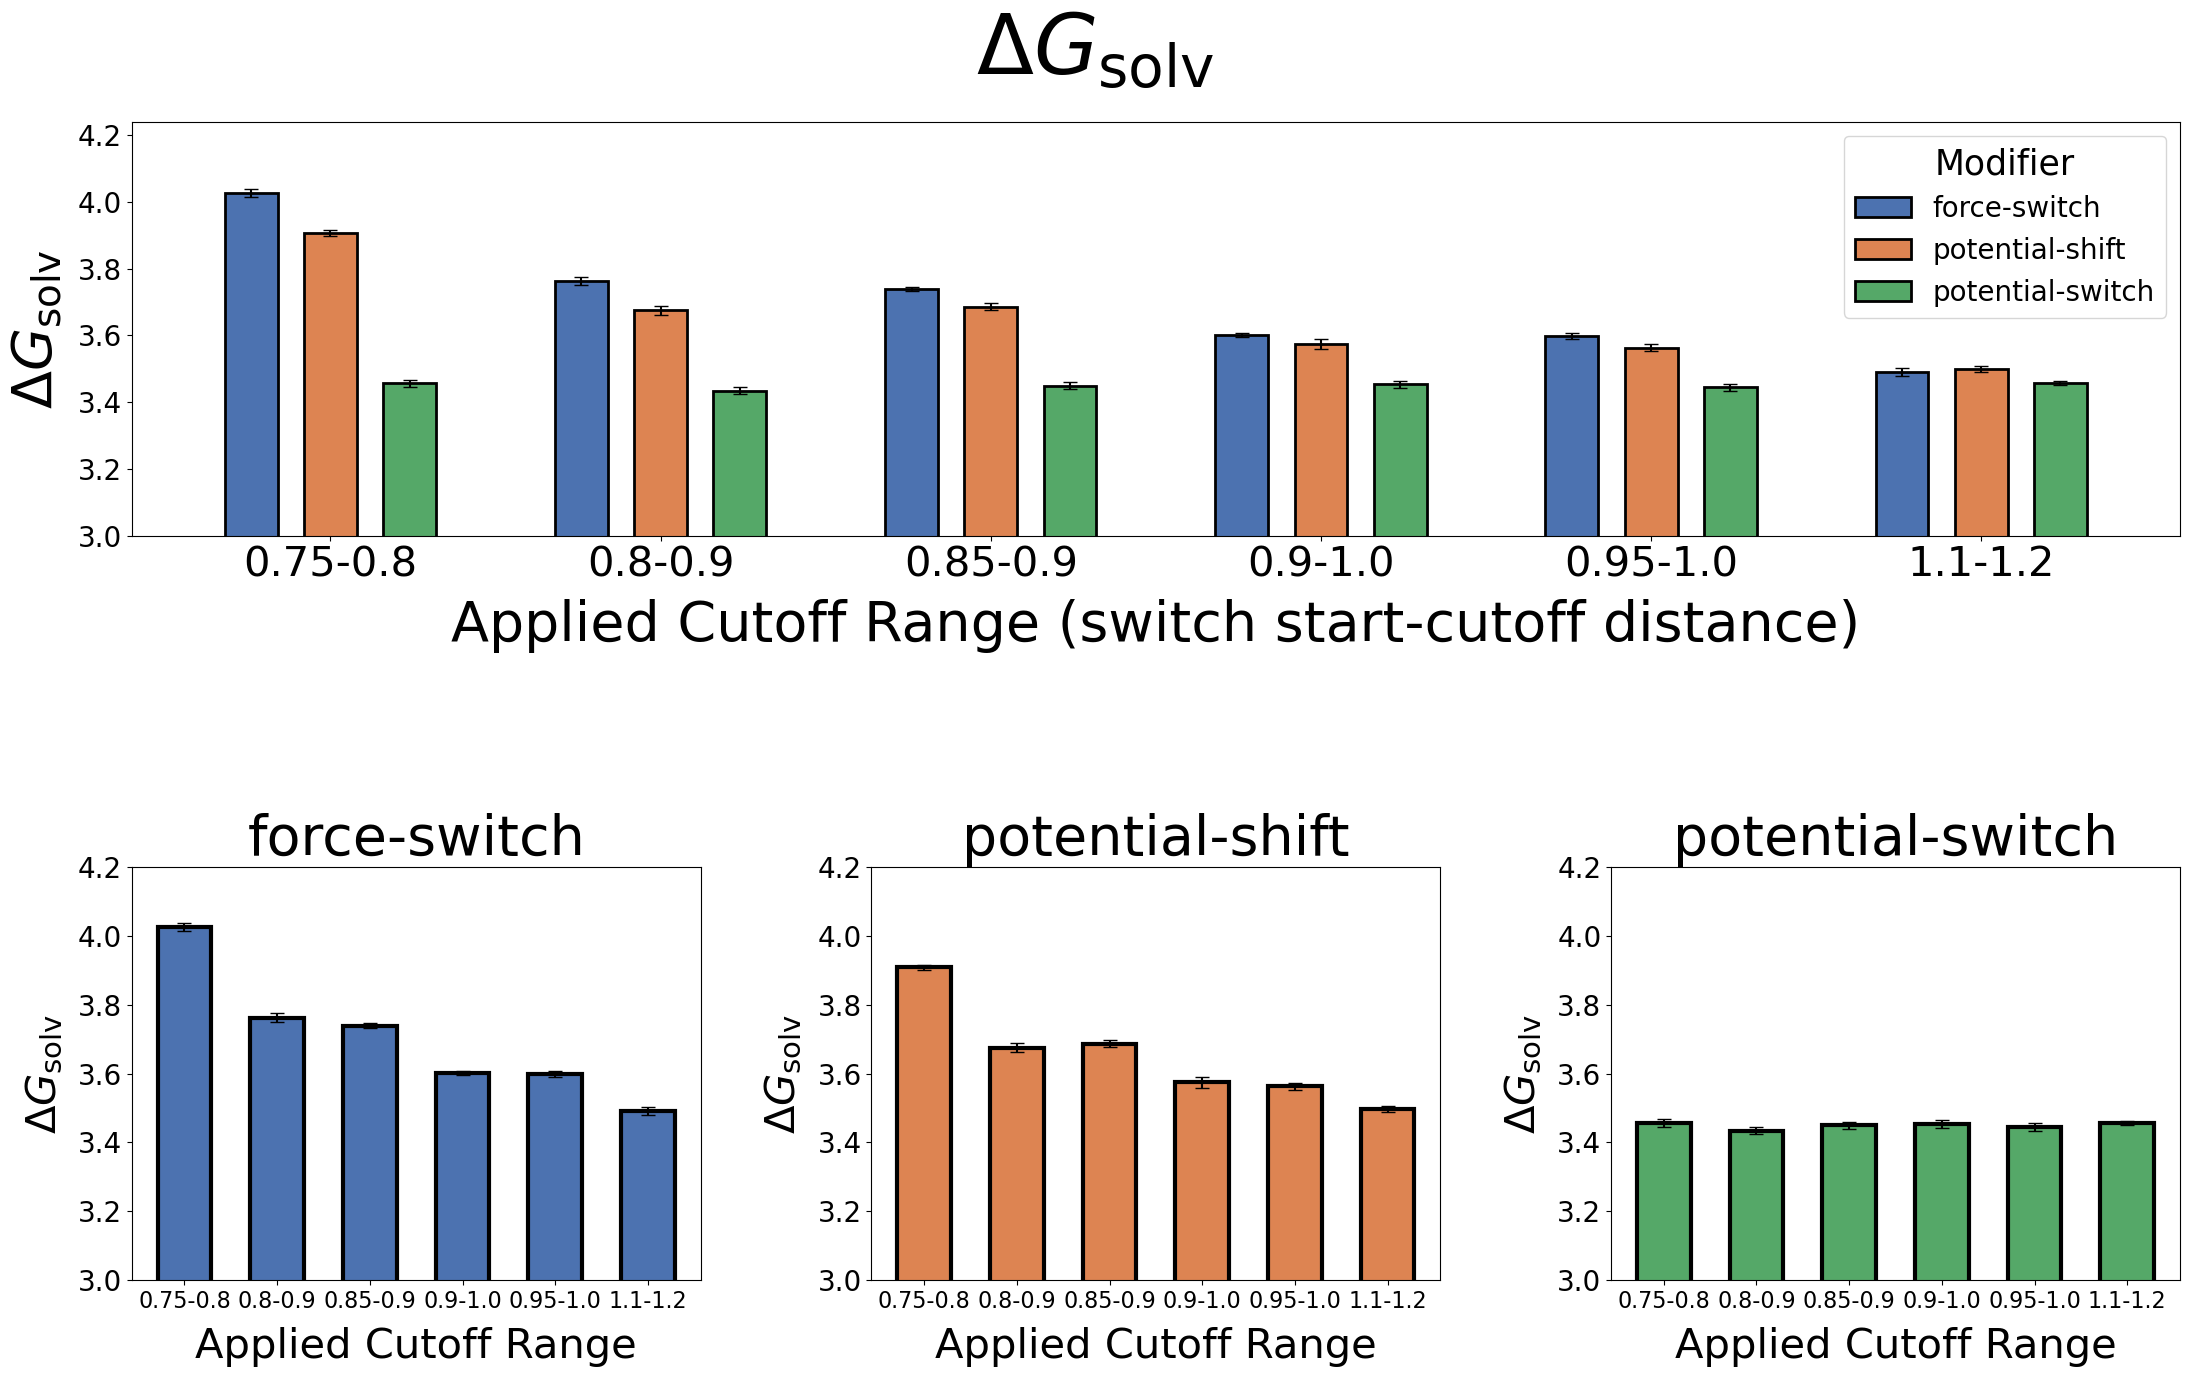

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a vibrant, colorblind-friendly palette for modifiers
modifier_colors = sns.color_palette("deep", n_colors=len(summary['Modifier'].unique()))

# Define the new order of ranges and the corresponding values in the DataFrame
new_order = ['0.75-0.8', '0.8-0.9', '0.85-0.9', '0.9-1.0', '0.95-1.0', '1.1-1.2']
original_values = ['75_8', '8_9', '85_9', '9_1', '95_1', '1.1_1.2']  # Corresponding DataFrame values

# Create a mapping from the new order to the original values
range_mapping = dict(zip(original_values, new_order))

# Set up the main figure
fig = plt.figure(figsize=(22, 14))

# Original plot (top row)
ax1 = fig.add_subplot(2, 1, 1)
bar_width = 0.4
spacing_factor = 2.5  # Adjusted for better spacing
positions = np.arange(len(original_values)) * spacing_factor  # Positions based on original values

# Original plot data (only for MBAR method)
modifiers = summary['Modifier'].unique()

# Loop through each modifier for the original plot, showing only MBAR values
for i, modifier in enumerate(modifiers):
    # Filter data based on the modifier and MBAR method
    modifier_data = summary[(summary['Modifier'] == modifier) & (summary['Method'] == 'MBAR')]
    
    if len(modifier_data) == 0:
        continue
    
    # Create a list to hold mean values in the new order
    mean_values = [modifier_data.loc[modifier_data['range'] == original]['mean_value'].values[0] 
                   if original in modifier_data['range'].values else np.nan for original in original_values]

    # Calculate bar positions
    bar_positions = positions + (i * bar_width * 1.5)  # Offset for spacing between modifiers
    color = modifier_colors[i]

    # Create bars with outlines
    ax1.bar(bar_positions, mean_values,
            yerr=[modifier_data.loc[modifier_data['range'] == original]['sem'].values[0] 
                  if original in modifier_data['range'].values else 0 for original in original_values],
            width=bar_width, capsize=5,
            label=f"{modifier}",
            edgecolor='black', linewidth=2,
            color=color)

# Customizing the original plot
ax1.set_xlabel('Applied Cutoff Range (switch start-cutoff distance)', fontsize=40, labelpad=10)
ax1.set_ylabel(r'$\Delta G_{\text{solv}}$', fontsize=40, labelpad=10)
ax1.set_xticks(positions + bar_width * 3/2)  # Center ticks in the group
ax1.set_xticklabels(new_order, fontsize=30)
ax1.tick_params(axis='y', labelsize=20)
ax1.legend(title='Modifier', loc='upper right', fontsize=20, title_fontsize=25)
ax1.set_ylim(bottom=3)

# Create subplots for each modifier (bottom row)
bottom_bar_width = 1.45
bottom_spacing_factor = 2.25

for i, modifier in enumerate(modifiers):
    ax = fig.add_subplot(2, 3, i + 4)
    modifier_data = summary[(summary['Modifier'] == modifier) & (summary['Method'] == 'MBAR')]
    
    if len(modifier_data) == 0:
        continue

    # Create a list to hold mean values for the bottom plot in the new order
    bottom_mean_values = [modifier_data.loc[modifier_data['range'] == original]['mean_value'].values[0] 
                          if original in modifier_data['range'].values else np.nan for original in original_values]

    # Create bars for the bottom plot using the same positions
    ax.bar(positions, bottom_mean_values,
           yerr=[modifier_data.loc[modifier_data['range'] == original]['sem'].values[0] 
                 if original in modifier_data['range'].values else 0 for original in original_values],
           width=bottom_bar_width, capsize=5,
           edgecolor='black', linewidth=3,
           color=modifier_colors[i])
    
    # Customizing each subplot
    ax.set_title(modifier, fontsize=40)
    ax.set_xlabel('Applied Cutoff Range', fontsize=30, labelpad=10)
    ax.set_ylabel(r'$\Delta G_{\text{solv}}$', fontsize=30, labelpad=10)
    
    ax.set_xticks(positions)
    ax.set_xticklabels(new_order, fontsize=16)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_ylim(bottom=3, top=4.2)

# Main title for the figure
fig.suptitle(r'$\Delta G_{\text{solv}}$', fontsize=60)

# Adjust layout for more space between rows and larger size
plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.8, wspace=0.3)
plt.show()



# Effects of cutoff on U($\lambda$)

### Combined figure

<>:47: SyntaxWarning: invalid escape sequence '\l'
<>:47: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_2470571/2930915555.py:47: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('U($\lambda$) (kJ/mol)')


Combined plot saved to /home/lindseywhitmore/projects/lennard-jones-miniproject/lj_plots/combined_lambda_plots.png


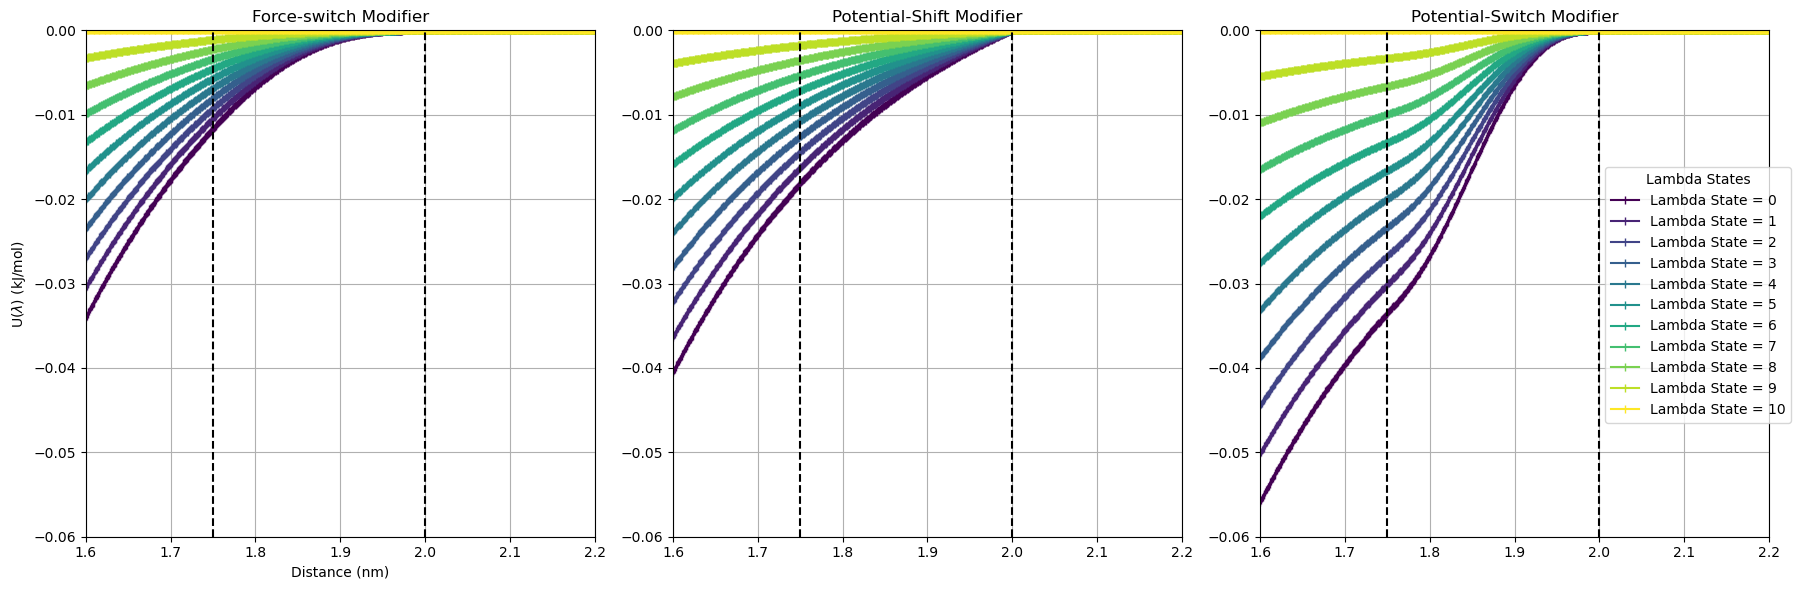

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Function to create a subplot for each CSV file
def create_subplot(ax, dist_file, title):
    # Read the CSV file
    df_w_r = pd.read_csv(dist_file)
    # Extract unique lambda values
    lambda_values = df_w_r['Lambda State'].unique()
    # Generate a colormap to differentiate between lambda values
    colors = plt.cm.viridis(np.linspace(0, 1, len(lambda_values)))
    
    # Loop over each lambda value and plot
    for i, lambda_val in enumerate(lambda_values):
        df_subset = df_w_r[(df_w_r['Distance (nm)'] >= 1.6) & (df_w_r['Distance (nm)'] <= 2.2) & (df_w_r['Lambda State'] == lambda_val)]
        ax.plot(df_subset['Distance (nm)'], df_subset['Total Energy (kJ/mol)'], marker='|', linestyle='-', color=colors[i], label=f'Lambda State = {lambda_val}')

    # Set plot title and limits
    ax.set_title(title)
    ax.set_xlim(1.6, 2.2)
    ax.set_ylim(-0.06, 0)
    ax.axvline(x=1.75, color='black', linestyle='--')
    ax.axvline(x=2.0, color='black', linestyle='--')
    ax.grid(True)

# Specify the directory to save the figures
save_dir = '/home/lindseywhitmore/projects/lennard-jones-miniproject/lj_plots'  # Replace with your desired directory path
os.makedirs(save_dir, exist_ok=True)

# Create a new figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Define file paths and titles
files_and_titles = [
    ("/home/lindseywhitmore/projects/lennard-jones-miniproject/lj/FE/2024.3_tests/beutler/shift_force-switch/beutler_shift-force-switch_2024.3.csv", 'Force-switch Modifier'),
    ("/home/lindseywhitmore/projects/lennard-jones-miniproject/lj/FE/2024.3_tests/beutler/potential-shift/beutler_potential-shift_2024.3.csv", 'Potential-Shift Modifier'),
    ("/home/lindseywhitmore/projects/lennard-jones-miniproject/lj/FE/2024.3_tests/beutler/switch_potential-switch/beutler_switch-potential-switch_2024.2.csv", 'Potential-Switch Modifier')
]

# Loop through files and create subplots
for i, (ax, (dist_file, title)) in enumerate(zip(axs, files_and_titles)):
    create_subplot(ax, dist_file, title)
    if i == 0:  # Only the first subplot gets labeled axes
        ax.set_xlabel('Distance (nm)')
        ax.set_ylabel('U($\lambda$) (kJ/mol)')

# Adjust layout
plt.tight_layout()

# Create a single legend outside the plots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', fontsize='medium', title='Lambda States')

# Save the combined plot
save_path = os.path.join(save_dir, 'combined_lambda_plots.png')
plt.savefig(save_path)
print(f'Combined plot saved to {save_path}')

# Show the combined plot
plt.show()

# Close the figure
plt.close()


<>:42: SyntaxWarning: invalid escape sequence '\l'
<>:42: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_2470571/1076326505.py:42: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('U($\lambda$) (kJ/mol)', fontsize=45)


Combined plot saved to /home/lindseywhitmore/projects/lennard-jones-miniproject/lj_plots/combined_lambda_plots.png


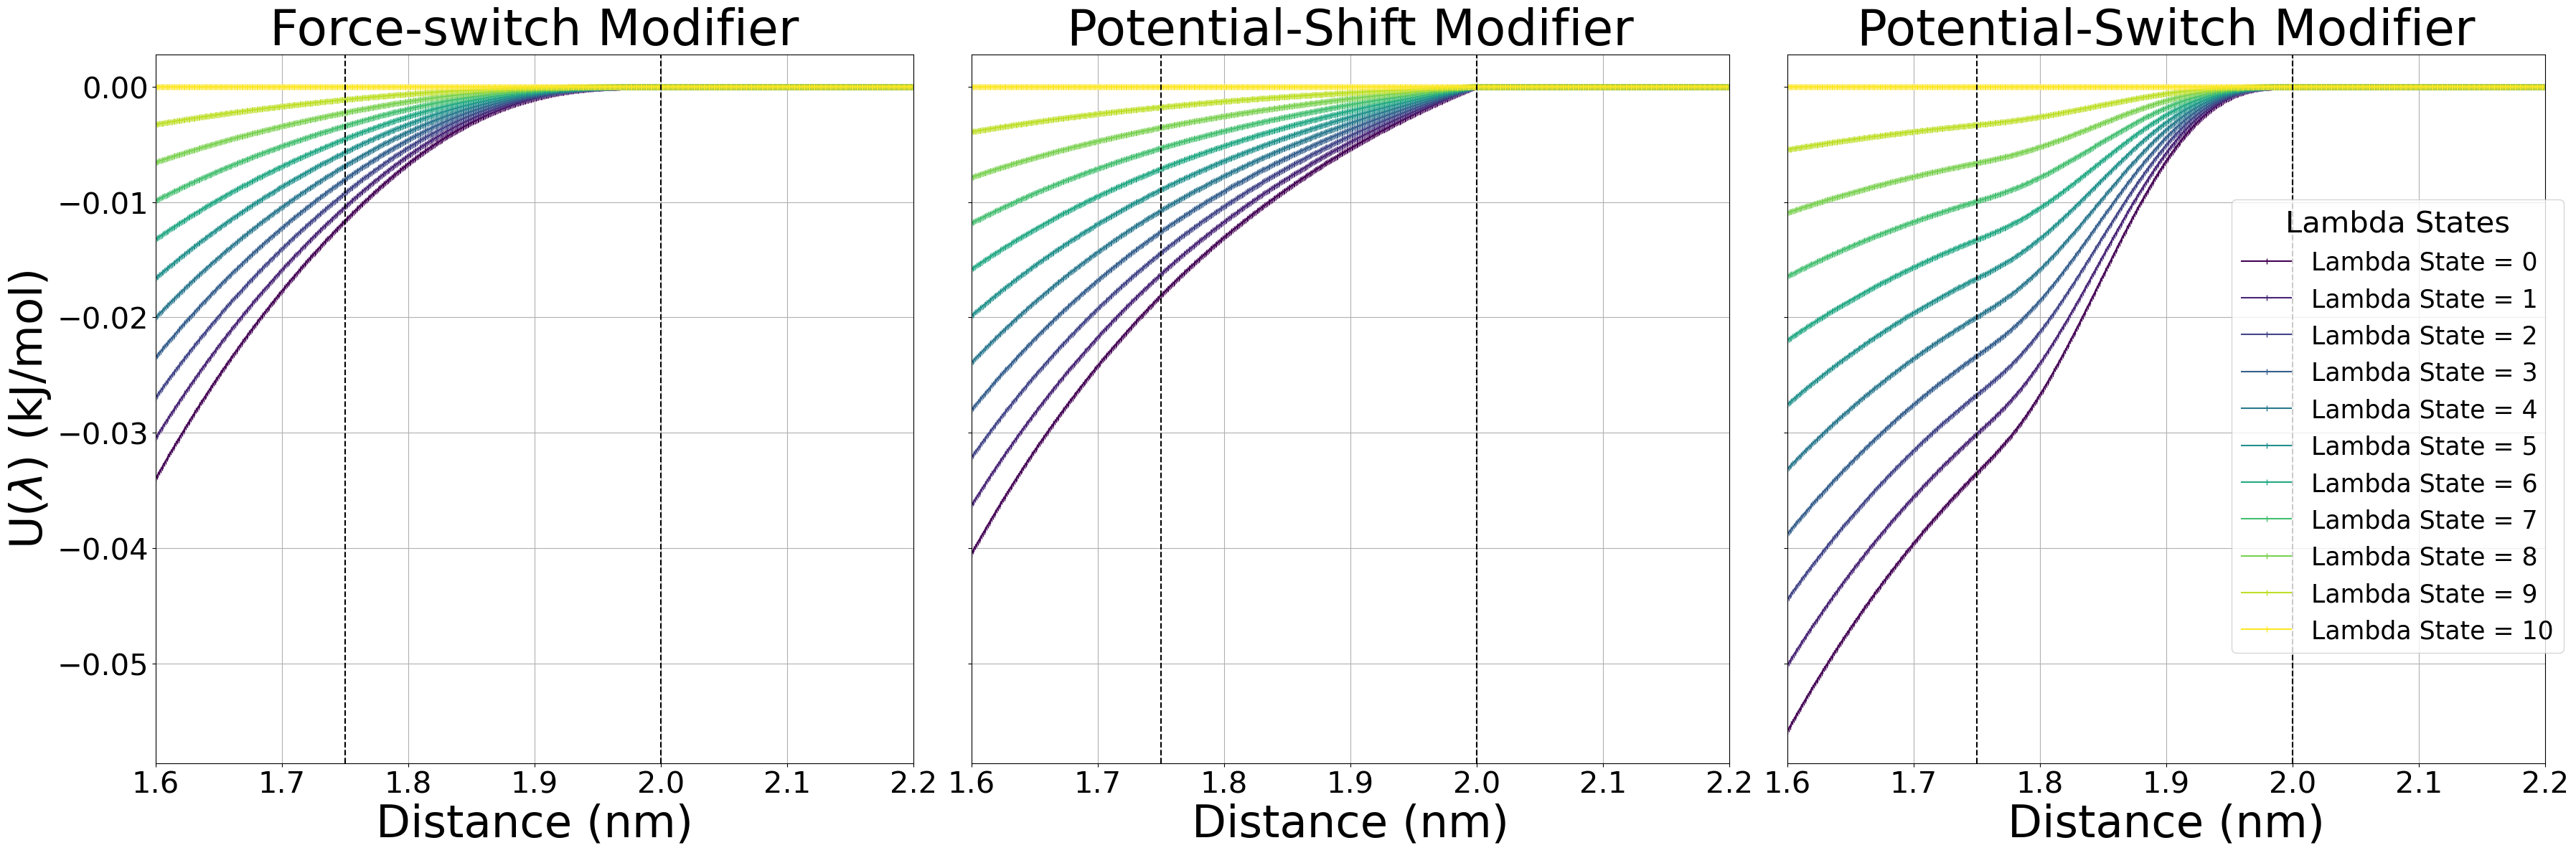

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Function to create a subplot for each CSV file
def create_subplot(ax, dist_file, title):
    # Read the CSV file
    df_w_r = pd.read_csv(dist_file)
    # Extract unique lambda values
    lambda_values = df_w_r['Lambda State'].unique()
    # Generate a colormap to differentiate between lambda values
    colors = plt.cm.viridis(np.linspace(0, 1, len(lambda_values)))
    
    # Loop over each lambda value and plot
    for i, lambda_val in enumerate(lambda_values):
        df_subset = df_w_r[(df_w_r['Distance (nm)'] >= 1.6) & (df_w_r['Distance (nm)'] <= 2.2) & (df_w_r['Lambda State'] == lambda_val)]
        ax.plot(df_subset['Distance (nm)'], df_subset['Total Energy (kJ/mol)'], marker='|', linestyle='-', color=colors[i], label=f'Lambda State = {lambda_val}')

    # Set plot title and limits
    ax.set_title(title, fontsize=50)
    ax.set_xlim(1.6, 2.2)
    ax.axvline(x=1.75, color='black', linestyle='--')
    ax.axvline(x=2.0, color='black', linestyle='--')
    ax.grid(True)
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)

# Specify the directory to save the figures
save_dir = '/home/lindseywhitmore/projects/lennard-jones-miniproject/lj_plots'  # Replace with your desired directory path
os.makedirs(save_dir, exist_ok=True)

# Create a new figure with 3 subplots, sharing the y-axis
fig, axs = plt.subplots(1, 3, figsize=(36, 12), sharey=True)


# Loop through files and create subplots
for i, (ax, (dist_file, title)) in enumerate(zip(axs, files_and_titles)):
    create_subplot(ax, dist_file, title)
    ax.set_xlabel('Distance (nm)', fontsize=45)  # Set x-axis label for each subplot
    if i == 0:  # Only the first subplot gets labeled y-axis
        ax.set_ylabel('U($\lambda$) (kJ/mol)', fontsize=45)

# Adjust layout
plt.tight_layout()

# Create a single legend outside the plots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', fontsize=25, title='Lambda States', title_fontsize=30)

# Save the combined plot
save_path = os.path.join(save_dir, 'combined_lambda_plots.png')
plt.savefig(save_path)
print(f'Combined plot saved to {save_path}')

# Show the combined plot
plt.show()

# Close the figure
plt.close()


## This section of plots is for the potential-shift modifier

Combined plot saved to /home/lindseywhitmore/projects/lennard-jones-miniproject/lj_plots/beutler_potential-shift_2024.3_combined_lambda.png


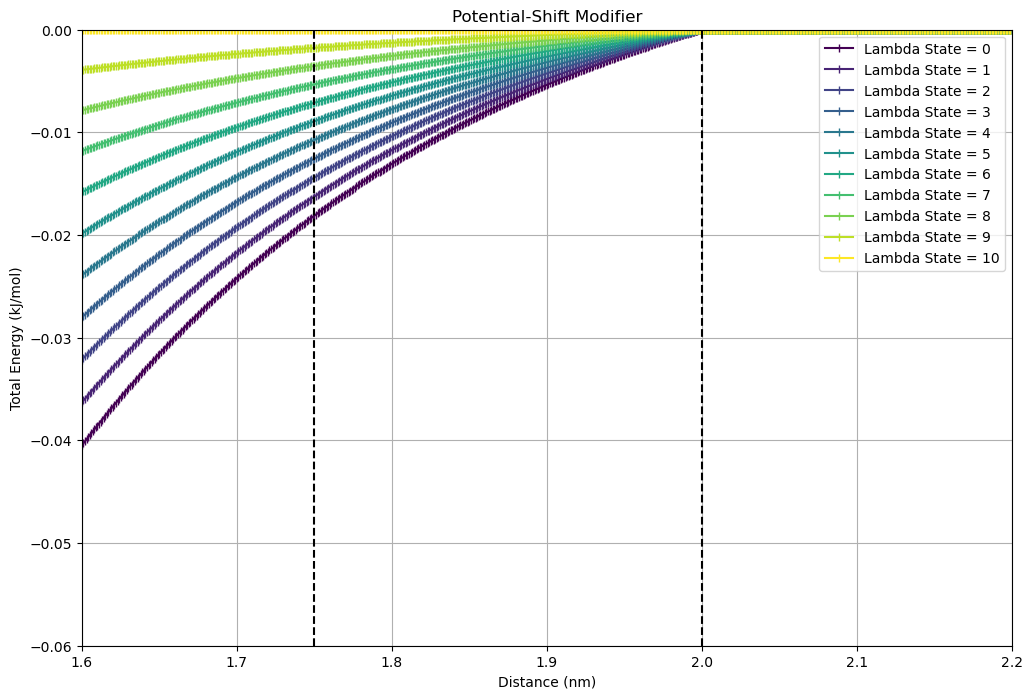

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
# Path to the CSV file
DistFile = "/home/lindseywhitmore/projects/lennard-jones-miniproject/lj/FE/2024.3_tests/beutler/potential-shift/beutler_potential-shift_2024.3.csv"  # Update with your actual CSV file path
# Extract the base name of the CSV file without the extension
base_filename = os.path.splitext(os.path.basename(DistFile))[0]
# Read the CSV file
df_w_r = pd.read_csv(DistFile)
# Specify the directory to save the figures
save_dir = '/home/lindseywhitmore/projects/lennard-jones-miniproject/lj_plots'  # Replace with your desired directory path
# Create the output directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)
# Extract unique lambda values
lambda_values = df_w_r['Lambda State'].unique()
# Create a new figure for all lambda values
plt.figure(figsize=(12, 8))

# Generate a colormap to differentiate between lambda values
colors = plt.cm.viridis(np.linspace(0, 1, len(lambda_values)))

# Initialize a list to hold minimum values
min_values = []

# Loop over each lambda value and plot on the same axes
for i, lambda_val in enumerate(lambda_values):
    # Filter the DataFrame for the current lambda value and distance range
    df_subset = df_w_r[(df_w_r['Distance (nm)'] >= 1.6) & (df_w_r['Distance (nm)'] <= 2.2) & (df_w_r['Lambda State'] == lambda_val)]
    
    # Store the minimum value for this subset
    min_values.append(df_subset['Total Energy (kJ/mol)'].min())
    
    # Plot the data for the current lambda value
    plt.plot(df_subset['Distance (nm)'], df_subset['Total Energy (kJ/mol)'], marker='|', linestyle='-', color=colors[i], label=f'Lambda State = {lambda_val}')

# Set plot labels and title
plt.xlabel('Distance (nm)')
plt.ylabel('Total Energy (kJ/mol)')
plt.title('Potential-Shift Modifier')

# Set x limits
plt.xlim(1.6, 2.2)

# Set y limits: minimum based on the overall minimum, maximum set to 0
plt.ylim(-0.06, 0)

# Add a dashed vertical line at x = 1.75
plt.axvline(x=1.75, color='black', linestyle='--')
plt.axvline(x=2.0, color='black', linestyle='--')

# Enable grid
plt.grid(True)

# Add a legend
plt.legend(loc='best')

# Save the combined plot
save_path = os.path.join(save_dir, f'{base_filename}_combined_lambda.png')
plt.savefig(save_path)
print(f'Combined plot saved to {save_path}')

# Show the plot
plt.show()

# Close the figure
plt.close()


### Subplots for potential shift at each lambda value

In [17]:
# # Create subplots: one row per lambda state
# n_lambdas = len(lambda_values)
# n_cols = 3  # Define how many columns you want (e.g., 3)
# n_rows = int(np.ceil(n_lambdas / n_cols))  # Calculate the number of rows
# # Create a figure and subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)
# # Flatten the axes array for easy iteration
# axes = axes.flatten()
# # Loop over each lambda value and plot in the corresponding subplot
# for i, lambda_val in enumerate(lambda_values):
#     # Filter the DataFrame for the current lambda value and distance range
#     df_subset = df_w_r[(df_w_r['Distance (nm)'] >= 1.75) & (df_w_r['Distance (nm)'] <= 2.20) & (df_w_r['Lambda State'] == lambda_val)]
#     # Plot the data on the i-th subplot
#     axes[i].plot(df_subset['Distance (nm)'], df_subset['Total Energy (kJ/mol)'], marker='|', linestyle='-', color='black')
#     # Set labels and title for the subplot
#     axes[i].set_xlabel('Distance (nm)')
#     axes[i].set_ylabel('Total Energy (kJ/mol)')
#     axes[i].set_title(f'Lambda State = {lambda_val}')
#     # Set x limits for consistency
#     axes[i].set_xlim(1.75, 2.20)
#     # Set y limits dynamically for each subplot based on its own data
#     y_min = df_subset['Total Energy (kJ/mol)'].min()
#     y_max = df_subset['Total Energy (kJ/mol)'].max()
#     axes[i].set_ylim(y_min, y_max)
#     # Enable grid for each subplot
#     axes[i].grid(True)
# # If there are extra empty subplots, turn them off
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])
# # Save the full figure
# save_path = os.path.join(save_dir, f'{base_filename}_subplots_lambda.png')
# plt.savefig(save_path)
# print(f'Subplots saved to {save_path}')
# # Show the figure
# plt.show()
# # Close the figure
# plt.close()

In [18]:
# # Create subplots: one row per lambda state
# n_lambdas = len(lambda_values)
# n_cols = 3  # Define how many columns you want (e.g., 3)
# n_rows = int(np.ceil(n_lambdas / n_cols))  # Calculate the number of rows
# # Create a figure and subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)
# # Flatten the axes array for easy iteration
# axes = axes.flatten()
# # Loop over each lambda value and plot in the corresponding subplot
# for i, lambda_val in enumerate(lambda_values):
#     # Filter the DataFrame for the current lambda value and distance range
#     df_subset = df_w_r[(df_w_r['Distance (nm)'] >= 0.2) & (df_w_r['Distance (nm)'] <= 2.2) & (df_w_r['Lambda State'] == lambda_val)]
#     # Plot the data on the i-th subplot
#     axes[i].plot(df_subset['Distan# Extract unique lambda values and sort them
# lambda_values = np.sort(df_w_r['Lambda State'].unique())
# # Create a new figure for all lambda values
# plt.figure(figsize=(12, 8))
# # Generate a colormap to differentiate between lambda values
# colors = plt.cm.viridis(np.linspace(0, 1, len(lambda_values)))
# # Loop over each lambda value and plot on the same axes
# for i, lambda_val in enumerate(lambda_values):
#     # Filter the DataFrame for the current lambda value and distance range
#     df_subset = df_w_r[
#         (df_w_r['Distance (nm)'] >= 1.5) &
#         (df_w_r['Distance (nm)'] <= 2.20) &
#         (df_w_r['Lambda State'] == lambda_val)
#     ]
#     # Subtract the minimum energy value of this lambda state to normalize
#     min_energy = df_subset['Total Energy (kJ/mol)'].min()
#     normalized_energy = df_subset['Total Energy (kJ/mol)'] - min_energy
#     # Plot the normalized data for the current lambda value
#     plt.plot(
#         df_subset['Distance (nm)'],
#         normalized_energy,
#         marker='|',
#         linestyle='-',
#         color=colors[i],
#         label=f'Lambda State = {lambda_val}'
#     )
# # Set plot labels and title
# plt.xlabel('Distance (nm)')
# plt.ylabel('Normalized Total Energy (kJ/mol)')
# plt.title('Force-Switch: Normalized Total Energy vs. Distance for All Lambda States')
# # Set x limits
# plt.xlim(1.75, 2.20)
# # Enable grid
# plt.grid(True)
# # Add a legend
# plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
# # Save the combined plot
# save_path = os.path.join(save_dir, f'{base_filename}_normalized_lambda.png')
# plt.savefig(save_path)
# print(f'Combined plot saved to {save_path}')
# # Show the plot
# plt.show()
# # Close the figure
# plt.close()ce (nm)'], df_subset['Total Energy (kJ/mol)'], marker='|', linestyle='-', color='black')
#     # Set labels and title for the subplot
#     axes[i].set_xlabel('Distance (nm)')
#     axes[i].set_ylabel('Total Energy (kJ/mol)')
#     axes[i].set_title(f'Lambda State = {lambda_val}')
#     # Set x limits for consistency
#     axes[i].set_xlim(0.2, 2.2)
#     # Set y limits dynamically for each subplot based on its own data
#     y_min = df_subset['Total Energy (kJ/mol)'].min()
#     y_max = df_subset['Total Energy (kJ/mol)'].max()
#     axes[i].set_ylim(y_min, y_max)
#     # Enable grid for each subplot
#     axes[i].grid(True)
# # If there are extra empty subplots, turn them off
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])
# # Save the full figure
# save_path = os.path.join(save_dir, f'{base_filename}_subplots_lambda_full_range.png')
# plt.savefig(save_path)
# print(f'Subplots saved to {save_path}')
# # Show the figure
# plt.show()
# # Close the figure
# plt.close()

In [19]:
# # Extract unique lambda values and sort them
# lambda_values = np.sort(df_w_r['Lambda State'].unique())
# # Create a new figure for all lambda values
# plt.figure(figsize=(12, 8))
# # Generate a colormap to differentiate between lambda values
# colors = plt.cm.viridis(np.linspace(0, 1, len(lambda_values)))
# # Loop over each lambda value and plot on the same axes
# for i, lambda_val in enumerate(lambda_values):
#     # Filter the DataFrame for the current lambda value and distance range
#     df_subset = df_w_r[
#         (df_w_r['Distance (nm)'] >= 1.5) &
#         (df_w_r['Distance (nm)'] <= 2.20) &
#         (df_w_r['Lambda State'] == lambda_val)
#     ]
#     # Subtract the minimum energy value of this lambda state to normalize
#     min_energy = df_subset['Total Energy (kJ/mol)'].min()
#     normalized_energy = df_subset['Total Energy (kJ/mol)'] - min_energy
#     # Plot the normalized data for the current lambda value
#     plt.plot(
#         df_subset['Distance (nm)'],
#         normalized_energy,
#         marker='|',
#         linestyle='-',
#         color=colors[i],
#         label=f'Lambda State = {lambda_val}'
#     )
# # Set plot labels and title
# plt.xlabel('Distance (nm)')
# plt.ylabel('Normalized Total Energy (kJ/mol)')
# plt.title('Potential-Shift Modifier: Normalized Total Energy vs. Distance for All Lambda States')
# # Set x limits
# plt.xlim(1.75, 2.20)
# # Enable grid
# plt.grid(True)
# # Add a legend
# plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
# # Save the combined plot
# save_path = os.path.join(save_dir, f'{base_filename}_normalized_lambda.png')
# plt.savefig(save_path)
# print(f'Combined plot saved to {save_path}')
# # Show the plot
# plt.show()
# # Close the figure
# plt.close()

## This section of plots is for force-switch

Combined plot saved to /home/lindseywhitmore/projects/lennard-jones-miniproject/lj_plots/beutler_shift-force-switch_2024.3_combined_lambda.png


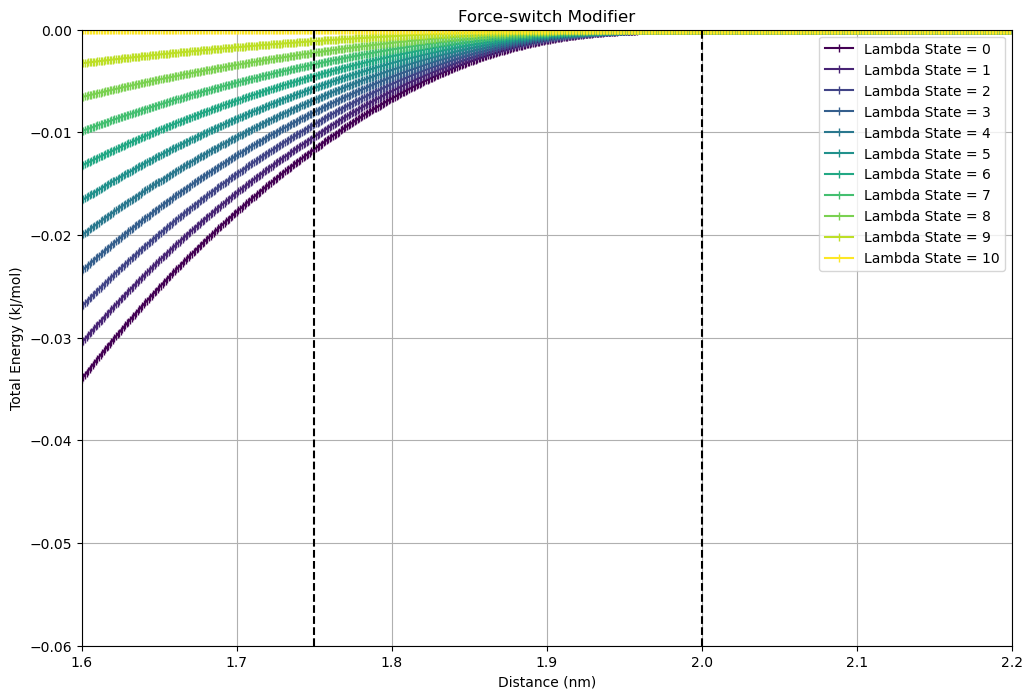

In [77]:
# Path to the CSV file
DistFile = "/home/lindseywhitmore/projects/lennard-jones-miniproject/lj/FE/2024.3_tests/beutler/shift_force-switch/beutler_shift-force-switch_2024.3.csv"  # Update with your actual CSV file path
# Extract the base name of the CSV file without the extension
base_filename = os.path.splitext(os.path.basename(DistFile))[0]
# Read the CSV file
df_w_r = pd.read_csv(DistFile)
# Specify the directory to save the figures
save_dir = '/home/lindseywhitmore/projects/lennard-jones-miniproject/lj_plots'  # Replace with your desired directory path
# Create the output directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)
# Extract unique lambda values
lambda_values = df_w_r['Lambda State'].unique()
# Generate a colormap to differentiate between lambda values
colors = plt.cm.viridis(np.linspace(0, 1, len(lambda_values)))

# Create a new figure for all lambda values
plt.figure(figsize=(12, 8))

# Generate a colormap to differentiate between lambda values
colors = plt.cm.viridis(np.linspace(0, 1, len(lambda_values)))

# Initialize a list to hold minimum values
min_values = []

# Loop over each lambda value and plot on the same axes
for i, lambda_val in enumerate(lambda_values):
    # Filter the DataFrame for the current lambda value and distance range
    df_subset = df_w_r[(df_w_r['Distance (nm)'] >= 1.6) & (df_w_r['Distance (nm)'] <= 2.2) & (df_w_r['Lambda State'] == lambda_val)]
    
    # Store the minimum value for this subset
    min_values.append(df_subset['Total Energy (kJ/mol)'].min())
    
    # Plot the data for the current lambda value
    plt.plot(df_subset['Distance (nm)'], df_subset['Total Energy (kJ/mol)'], marker='|', linestyle='-', color=colors[i], label=f'Lambda State = {lambda_val}')

# Set plot labels and title
plt.xlabel('Distance (nm)')
plt.ylabel('Total Energy (kJ/mol)')
plt.title('Force-switch Modifier')

# Set x limits
plt.xlim(1.6, 2.2)

# Set y limits: minimum based on the overall minimum, maximum set to 0
plt.ylim(-0.06, 0)

# Add a dashed vertical line at x = 1.75
plt.axvline(x=1.75, color='black', linestyle='--')
plt.axvline(x=2.0, color='black', linestyle='--')

# Enable grid
plt.grid(True)

# Add a legend
plt.legend(loc='best')

# Save the combined plot
save_path = os.path.join(save_dir, f'{base_filename}_combined_lambda.png')
plt.savefig(save_path)
print(f'Combined plot saved to {save_path}')

# Show the plot
plt.show()

# Close the figure
plt.close()
plt.close()

In [22]:
# # Create subplots: one row per lambda state
# n_lambdas = len(lambda_values)
# n_cols = 3  # Define how many columns you want (e.g., 3)
# n_rows = int(np.ceil(n_lambdas / n_cols))  # Calculate the number of rows
# # Create a figure and subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)
# # Flatten the axes array for easy iteration
# axes = axes.flatten()
# # Loop over each lambda value and plot in the corresponding subplot
# for i, lambda_val in enumerate(lambda_values):
#     # Filter the DataFrame for the current lambda value and distance range
#     df_subset = df_w_r[(df_w_r['Distance (nm)'] >= 1.75) & (df_w_r['Distance (nm)'] <= 2.20) & (df_w_r['Lambda State'] == lambda_val)]
#     # Plot the data on the i-th subplot
#     axes[i].plot(df_subset['Distance (nm)'], df_subset['Total Energy (kJ/mol)'], marker='|', linestyle='-', color='black')
#     # Set labels and title for the subplot
#     axes[i].set_xlabel('Distance (nm)')
#     axes[i].set_ylabel('Total Energy (kJ/mol)')
#     axes[i].set_title(f'Lambda State = {lambda_val}')
#     # Set x limits for consistency
#     axes[i].set_xlim(1.75, 2.20)
#     # Set y limits dynamically for each subplot based on its own data
#     y_min = df_subset['Total Energy (kJ/mol)'].min()
#     y_max = df_subset['Total Energy (kJ/mol)'].max()
#     axes[i].set_ylim(y_min, y_max)
#     # Enable grid for each subplot
#     axes[i].grid(True)
# # If there are extra empty subplots, turn them off
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])
# # Save the full figure
# save_path = os.path.join(save_dir, f'{base_filename}_subplots_lambda.png')
# plt.savefig(save_path)
# print(f'Subplots saved to {save_path}')
# # Show the figure
# plt.show()
# # Close the figure
# plt.close()

In [23]:
# # Create subplots: one row per lambda state
# n_lambdas = len(lambda_values)
# n_cols = 3  # Define how many columns you want (e.g., 3)
# n_rows = int(np.ceil(n_lambdas / n_cols))  # Calculate the number of rows
# # Create a figure and subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)
# # Flatten the axes array for easy iteration
# axes = axes.flatten()
# # Loop over each lambda value and plot in the corresponding subplot
# for i, lambda_val in enumerate(lambda_values):
#     # Filter the DataFrame for the current lambda value and distance range
#     df_subset = df_w_r[(df_w_r['Distance (nm)'] >= 0.2) & (df_w_r['Distance (nm)'] <= 2.2) & (df_w_r['Lambda State'] == lambda_val)]
#     # Plot the data on the i-th subplot
#     axes[i].plot(df_subset['Distance (nm)'], df_subset['Total Energy (kJ/mol)'], marker='|', linestyle='-', color='black')
#     # Set labels and title for the subplot
#     axes[i].set_xlabel('Distance (nm)')
#     axes[i].set_ylabel('Total Energy (kJ/mol)')
#     axes[i].set_title(f'Lambda State = {lambda_val}')
#     # Set x limits for consistency
#     axes[i].set_xlim(0.2, 2.2)
#     # Set y limits dynamically for each subplot based on its own data
#     y_min = df_subset['Total Energy (kJ/mol)'].min()
#     y_max = df_subset['Total Energy (kJ/mol)'].max()
#     axes[i].set_ylim(y_min, y_max)
#     # Enable grid for each subplot
#     axes[i].grid(True)
# # If there are extra empty subplots, turn them off
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])
# # Save the full figure
# save_path = os.path.join(save_dir, f'{base_filename}_subplots_lambda_full_range.png')
# plt.savefig(save_path)
# print(f'Subplots saved to {save_path}')
# # Show the figure
# plt.show()
# # Close the figure
# plt.close()

In [24]:
# # Extract unique lambda values and sort them
# lambda_values = np.sort(df_w_r['Lambda State'].unique())
# # Create a new figure for all lambda values
# plt.figure(figsize=(12, 8))
# # Generate a colormap to differentiate between lambda values
# colors = plt.cm.viridis(np.linspace(0, 1, len(lambda_values)))
# # Loop over each lambda value and plot on the same axes
# for i, lambda_val in enumerate(lambda_values):
#     # Filter the DataFrame for the current lambda value and distance range
#     df_subset = df_w_r[
#         (df_w_r['Distance (nm)'] >= 1.5) &
#         (df_w_r['Distance (nm)'] <= 2.20) &
#         (df_w_r['Lambda State'] == lambda_val)
#     ]
#     # Subtract the minimum energy value of this lambda state to normalize
#     min_energy = df_subset['Total Energy (kJ/mol)'].min()
#     normalized_energy = df_subset['Total Energy (kJ/mol)'] - min_energy
#     # Plot the normalized data for the current lambda value
#     plt.plot(
#         df_subset['Distance (nm)'],
#         normalized_energy,
#         marker='|',
#         linestyle='-',
#         color=colors[i],
#         label=f'Lambda State = {lambda_val}'
#     )
# # Set plot labels and title
# plt.xlabel('Distance (nm)')
# plt.ylabel('Normalized Total Energy (kJ/mol)')
# plt.title('Force-Switch: Normalized Total Energy vs. Distance for All Lambda States')
# # Set x limits
# plt.xlim(1.75, 2.20)
# # Enable grid
# plt.grid(True)
# # Add a legend
# plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
# # Save the combined plot
# save_path = os.path.join(save_dir, f'{base_filename}_normalized_lambda.png')
# plt.savefig(save_path)
# print(f'Combined plot saved to {save_path}')
# # Show the plot
# plt.show()
# # Close the figure
# plt.close()

## This section of plots is for potential-switch

Combined plot saved to /home/lindseywhitmore/projects/lennard-jones-miniproject/lj_plots/beutler_switch-potential-switch_2024.2_combined_lambda.png


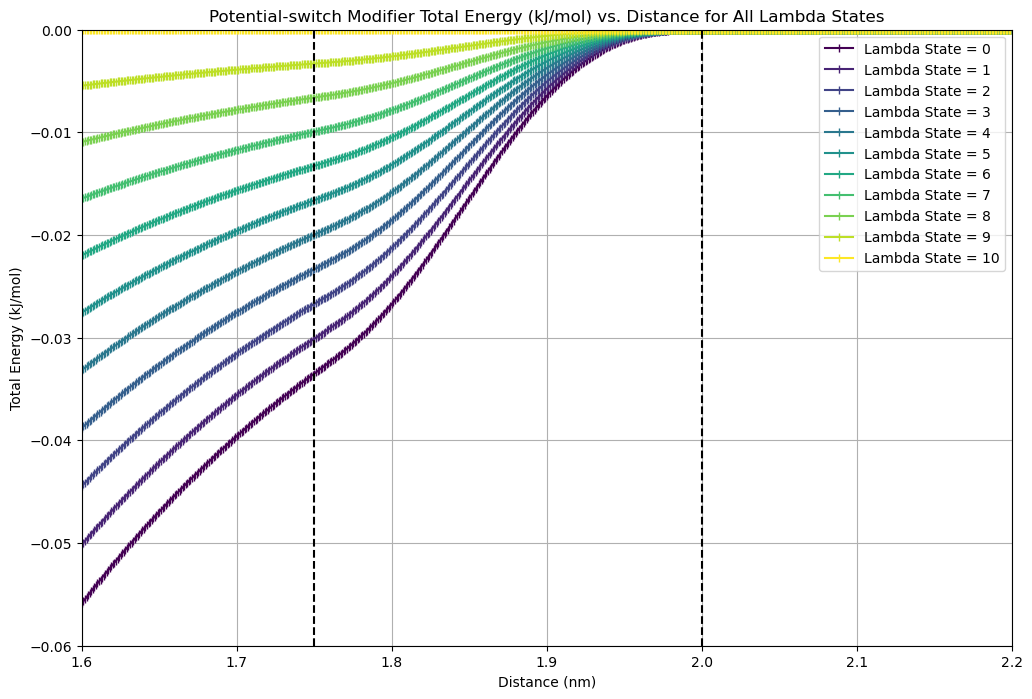

In [79]:
# Path to the CSV file
DistFile = "/home/lindseywhitmore/projects/lennard-jones-miniproject/lj/FE/2024.3_tests/beutler/switch_potential-switch/beutler_switch-potential-switch_2024.2.csv"  # Update with your actual CSV file path
# Extract the base name of the CSV file without the extension
base_filename = os.path.splitext(os.path.basename(DistFile))[0]
# Read the CSV file
df_w_r = pd.read_csv(DistFile)
# Specify the directory to save the figures
save_dir = '/home/lindseywhitmore/projects/lennard-jones-miniproject/lj_plots'  # Replace with your desired directory path
# Create the output directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)
# Extract unique lambda values
lambda_values = df_w_r['Lambda State'].unique()
# Generate a colormap to differentiate between lambda values
colors = plt.cm.viridis(np.linspace(0, 1, len(lambda_values)))

# Create a new figure for all lambda values
plt.figure(figsize=(12, 8))

# Generate a colormap to differentiate between lambda values
colors = plt.cm.viridis(np.linspace(0, 1, len(lambda_values)))

# Initialize a list to hold minimum values
min_values = []

# Loop over each lambda value and plot on the same axes
for i, lambda_val in enumerate(lambda_values):
    # Filter the DataFrame for the current lambda value and distance range
    df_subset = df_w_r[(df_w_r['Distance (nm)'] >= 1.6) & (df_w_r['Distance (nm)'] <= 2.2) & (df_w_r['Lambda State'] == lambda_val)]
    
    # Store the minimum value for this subset
    min_values.append(df_subset['Total Energy (kJ/mol)'].min())
    
    # Plot the data for the current lambda value
    plt.plot(df_subset['Distance (nm)'], df_subset['Total Energy (kJ/mol)'], marker='|', linestyle='-', color=colors[i], label=f'Lambda State = {lambda_val}')

# Set plot labels and title
plt.xlabel('Distance (nm)')
plt.ylabel('Total Energy (kJ/mol)')
plt.title('Potential-switch Modifier Total Energy (kJ/mol) vs. Distance for All Lambda States')

# Set x limits
plt.xlim(1.6, 2.2)

# Set y limits: minimum based on the overall minimum, maximum set to 0
plt.ylim(-0.06, 0)

# Add a dashed vertical line at x = 1.75
plt.axvline(x=1.75, color='black', linestyle='--')
plt.axvline(x=2.0, color='black', linestyle='--')

# Enable grid
plt.grid(True)

# Add a legend
plt.legend(loc='best')

# Save the combined plot
save_path = os.path.join(save_dir, f'{base_filename}_combined_lambda.png')
plt.savefig(save_path)
print(f'Combined plot saved to {save_path}')

# Show the plot
plt.show()

# Close the figure
plt.close()
plt.close()

In [27]:
# # Create subplots: one row per lambda state
# n_lambdas = len(lambda_values)
# n_cols = 3  # Define how many columns you want (e.g., 3)
# n_rows = int(np.ceil(n_lambdas / n_cols))  # Calculate the number of rows
# # Create a figure and subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)
# # Flatten the axes array for easy iteration
# axes = axes.flatten()
# # Loop over each lambda value and plot in the corresponding subplot
# for i, lambda_val in enumerate(lambda_values):
#     # Filter the DataFrame for the current lambda value and distance range
#     df_subset = df_w_r[(df_w_r['Distance (nm)'] >= 1.75) & (df_w_r['Distance (nm)'] <= 2.20) & (df_w_r['Lambda State'] == lambda_val)]
#     # Plot the data on the i-th subplot
#     axes[i].plot(df_subset['Distance (nm)'], df_subset['Total Energy (kJ/mol)'], marker='|', linestyle='-', color='black')
#     # Set labels and title for the subplot
#     axes[i].set_xlabel('Distance (nm)')
#     axes[i].set_ylabel('Total Energy (kJ/mol)')
#     axes[i].set_title(f'Lambda State = {lambda_val}')
#     # Set x limits for consistency
#     axes[i].set_xlim(1.75, 2.20)
#     # Set y limits dynamically for each subplot based on its own data
#     y_min = df_subset['Total Energy (kJ/mol)'].min()
#     y_max = df_subset['Total Energy (kJ/mol)'].max()
#     axes[i].set_ylim(y_min, y_max)
#     # Enable grid for each subplot
#     axes[i].grid(True)
# # If there are extra empty subplots, turn them off
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])
# # Save the full figure
# save_path = os.path.join(save_dir, f'{base_filename}_subplots_lambda.png')
# plt.savefig(save_path)
# print(f'Subplots saved to {save_path}')
# # Show the figure
# plt.show()
# # Close the figure
# plt.close()

In [28]:
# # Create subplots: one row per lambda state
# n_lambdas = len(lambda_values)
# n_cols = 3  # Define how many columns you want (e.g., 3)
# n_rows = int(np.ceil(n_lambdas / n_cols))  # Calculate the number of rows
# # Create a figure and subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)
# # Flatten the axes array for easy iteration
# axes = axes.flatten()
# # Loop over each lambda value and plot in the corresponding subplot
# for i, lambda_val in enumerate(lambda_values):
#     # Filter the DataFrame for the current lambda value and distance range
#     df_subset = df_w_r[(df_w_r['Distance (nm)'] >= 0.2) & (df_w_r['Distance (nm)'] <= 2.2) & (df_w_r['Lambda State'] == lambda_val)]
#     # Plot the data on the i-th subplot
#     axes[i].plot(df_subset['Distance (nm)'], df_subset['Total Energy (kJ/mol)'], marker='|', linestyle='-', color='black')
#     # Set labels and title for the subplot
#     axes[i].set_xlabel('Distance (nm)')
#     axes[i].set_ylabel('Total Energy (kJ/mol)')
#     axes[i].set_title(f'Lambda State = {lambda_val}')
#     # Set x limits for consistency
#     axes[i].set_xlim(0.2, 2.2)
#     # Set y limits dynamically for each subplot based on its own data
#     y_min = df_subset['Total Energy (kJ/mol)'].min()
#     y_max = df_subset['Total Energy (kJ/mol)'].max()
#     axes[i].set_ylim(y_min, y_max)
#     # Enable grid for each subplot
#     axes[i].grid(True)
# # If there are extra empty subplots, turn them off
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])
# # Save the full figure
# save_path = os.path.join(save_dir, f'{base_filename}_subplots_lambda_full_range.png')
# plt.savefig(save_path)
# print(f'Subplots saved to {save_path}')
# # Show the figure
# plt.show()
# # Close the figure
# plt.close()

In [29]:
# # Extract unique lambda values and sort them
# lambda_values = np.sort(df_w_r['Lambda State'].unique())
# # Create a new figure for all lambda values
# plt.figure(figsize=(12, 8))
# # Generate a colormap to differentiate between lambda values
# colors = plt.cm.viridis(np.linspace(0, 1, len(lambda_values)))
# # Loop over each lambda value and plot on the same axes
# for i, lambda_val in enumerate(lambda_values):
#     # Filter the DataFrame for the current lambda value and distance range
#     df_subset = df_w_r[
#         (df_w_r['Distance (nm)'] >= 1.5) &
#         (df_w_r['Distance (nm)'] <= 2.20) &
#         (df_w_r['Lambda State'] == lambda_val)
#     ]
#     # Subtract the minimum energy value of this lambda state to normalize
#     min_energy = df_subset['Total Energy (kJ/mol)'].min()
#     normalized_energy = df_subset['Total Energy (kJ/mol)'] - min_energy
#     # Plot the normalized data for the current lambda value
#     plt.plot(
#         df_subset['Distance (nm)'],
#         normalized_energy,
#         marker='|',
#         linestyle='-',
#         color=colors[i],
#         label=f'Lambda State = {lambda_val}'
#     )
# # Set plot labels and title
# plt.xlabel('Distance (nm)')
# plt.ylabel('Normalized Total Energy (kJ/mol)')
# plt.title('Potential-Switch: Normalized Total Energy vs. Distance for All Lambda States')
# # Set x limits
# plt.xlim(1.75, 2.20)
# # Enable grid
# plt.grid(True)
# # Add a legend
# plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
# # Save the combined plot
# save_path = os.path.join(save_dir, f'{base_filename}_normalized_lambda.png')
# plt.savefig(save_path)
# print(f'Combined plot saved to {save_path}')
# # Show the plot
# plt.show()
# # Close the figure
# plt.close()